<a href="https://colab.research.google.com/github/Klaudio17/IGUaNA_magnetics/blob/main/IGUaNA_Magnetics_survey_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

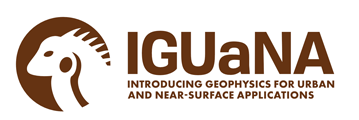


The following script will allow you to produce a 2D magnetic contour plot of the magnetic survey conducted at Cedar Grove, NJ. 

**Survey Details**:
*   Survey measurements were collected in 0.5 meter spaced intervals
*   The grid dimensions are 16 meters (X) by 28 meters (Y) 


 **Directions**
*   Follow the steps listed in sequential order. You will be directed to only edit specific parts of the script (changing other parts of the script will cause errors!). 
*   When editing directed parts of the script (e.g., changing the color map), ensure you've correctly written the text to avoid script errors. 
*   To run the code, select the "Runtime" tab at the top, and select "Run all".


Import your libraries for analysis and visualization

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

In [10]:
# The csv is saved on a github repository. We get the URL to quickly import into our Jupyter Notebook
raw_mag_data = r'https://raw.githubusercontent.com/Klaudio17/IGUaNA_magnetics/main/raw_mag_data.csv' 

download1 = requests.get(raw_mag_data).content

# Reading the downloaded content and turning it into a pandas dataframe
raw_mag_data = pd.read_csv(io.StringIO(download1.decode('utf-8')))

Type the variable name to display the data.

In [11]:
raw_mag_data

,X,Y,uncorrected mag data (nT),Base station field data (nT),corrected mag data (nT)
0,0.0,0.0,50650.50,51450.5,NaN
1,0.0,0.5,50901.83,51451.8,NaN
2,0.0,1.0,51008.99,51451.4,NaN
3,0.0,1.5,51078.99,51451.7,NaN
4,0.0,2.0,51091.46,51451.0,NaN
...,...,...,...,...,...
1876,-16.0,26.0,51369.54,51452.0,NaN
1877,-16.0,26.5,51363.88,51451.6,NaN
1878,-16.0,27.0,51357.94,51451.5,NaN
1879,-16.0,27.5,51367.69,51452.8,NaN


Correct for the Earth's magnetic field. We want to use only the Mag_data column and subtract this from the correction_data dataframe.

In [12]:
raw_mag_data['corrected mag data (nT)'] = abs(raw_mag_data['uncorrected mag data (nT)'] - raw_mag_data['Base station field data (nT)'])

Below is the updated 'Mag_data' after subtracting the earth's mag field.

In [13]:
raw_mag_data

,X,Y,uncorrected mag data (nT),Base station field data (nT),corrected mag data (nT)
0,0.0,0.0,50650.50,51450.5,800.00
1,0.0,0.5,50901.83,51451.8,549.97
2,0.0,1.0,51008.99,51451.4,442.41
3,0.0,1.5,51078.99,51451.7,372.71
4,0.0,2.0,51091.46,51451.0,359.54
...,...,...,...,...,...
1876,-16.0,26.0,51369.54,51452.0,82.46
1877,-16.0,26.5,51363.88,51451.6,87.72
1878,-16.0,27.0,51357.94,51451.5,93.56
1879,-16.0,27.5,51367.69,51452.8,85.11


Below is two ways of plotting the data.

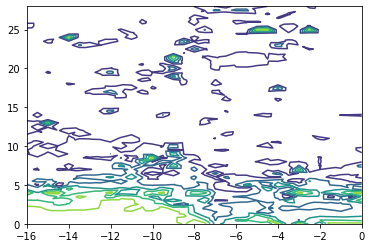

In [14]:
# Initialize plot objects
fig = plt.figure()
ax = fig.add_subplot(111)

# Generate a contour line plot
cp = ax.tricontour(raw_mag_data['X'], raw_mag_data['Y'], raw_mag_data['corrected mag data (nT)'])

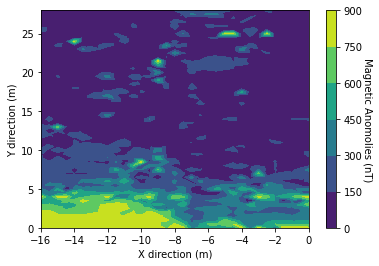

In [15]:
# Initialize plot objects
fig = plt.figure()
ax = fig.add_subplot(111)

# Generate a contour plot
cp = ax.tricontourf(raw_mag_data['X'], raw_mag_data['Y'], raw_mag_data['corrected mag data (nT)'])
ax.set_xlabel('X direction (m)')
ax.set_ylabel('Y direction (m)')
cbar = fig.colorbar(cp)
cbar.set_label('Magnetic Anomolies (nT)', rotation = 270, labelpad = 10)

This is the documentation for the contouring function.
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.tricontourf.html

We can limit the magnetic values between a user defined range with vmin and vmax. We can also change the color of the contour plot as well

This is a link to all the color maps you can choose from:
https://matplotlib.org/stable/tutorials/colors/colormaps.html